### pca vs tsne on mushrrom datasets

In [73]:
#lets apply pca and see the differecnce 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [74]:
df = pd.read_csv('dataset/mushrooms.csv')
print(df.shape)
X = df.drop(['class'] , axis =1 )
y = df['class']
print(X.shape)
print(y.shape)

(8124, 23)
(8124, 22)
(8124,)


In [75]:
#pca needs standarized data sets thus
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#note that standarscale only works for numerical columns thus 

from sklearn.preprocessing import OneHotEncoder
encooder = OneHotEncoder(sparse= False)

In [76]:
X_cat = encooder.fit_transform(X)
X_cat_df = pd.DataFrame(X_cat , columns= encooder.get_feature_names_out())
X_cat_df.sample(3)

/home/ujjwal/.conda/envs/test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4345,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2706,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [77]:
#standardization 
std_X = StandardScaler().fit_transform(X_cat_df)

In [78]:
#now we can apply pca 
X_pca = PCA(n_components =2 ).fit_transform(std_X)
X_pca.shape

(8124, 2)

In [79]:
#combining with our t 
X_pca = (np.vstack((X_pca.T , y ))).T

In [86]:
df_pca = pd.DataFrame(X_pca , columns= ['Component-1' , 'Component-2' , 'Output'])

In [87]:
df_pca

,Component-1,Component-2,Output
0,-3.28475,1.020159,p
1,-3.969466,-0.856866,e
2,-4.95857,-0.211072,e
3,-3.469978,0.337982,p
4,-2.726568,0.889672,e
...,...,...,...
8119,-1.393191,9.999911,e
8120,-1.287636,9.097582,e
8121,-1.873895,8.64939,e
8122,3.636888,4.460832,p


<Axes: xlabel='Component-1', ylabel='Component-2'>

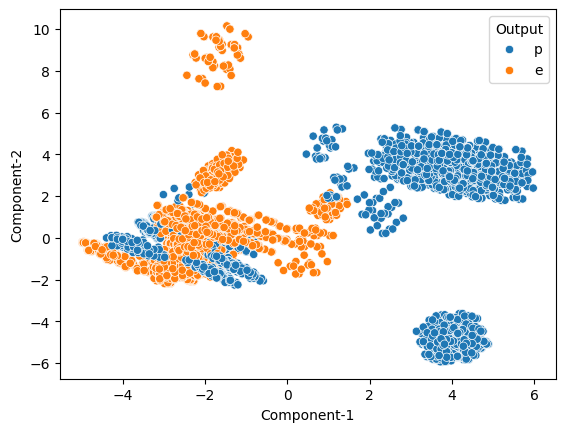

In [89]:
sns.scatterplot(data = df_pca , hue = 'Output' , x = 'Component-1' , y ='Component-2' )

In [94]:
import matplotlib.image as mpimg


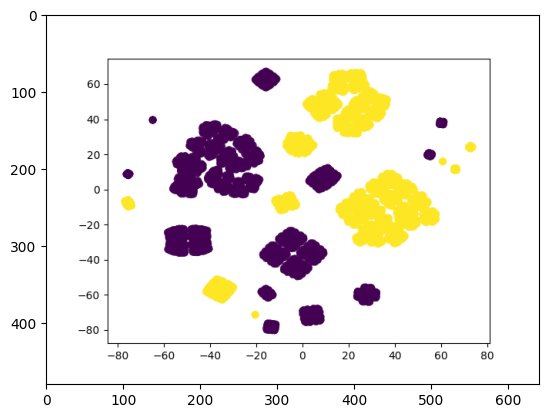

In [98]:
img_array = mpimg.imread('mushroom.png')
plt.imshow(img_array)
#plot by t-sne 